In [2]:
import pymongo
import pandas as pd

client = pymongo.MongoClient('localhost', 27017)
mydb = client['Dcard']
dcard = mydb['Dcard-1']

def mongo_find(x):
    return(pd.DataFrame(
        data = [{
            'id':x['id'],
            'title':x['title'],
            'content':x['content'],
            'createdAt':x['createdAt'],
            'updatedAt':x['updatedAt'],
            'commentCount':x['commentCount'],
            'forumName':x['forumName'],
            'forumAlias':x['forumAlias'],
            'gender':x['gender'],
            'likeCount':x['likeCount'],
            'reactions':x['reactions'],
            'topics':x['topics'],}], 
        columns=['id','title','content','createdAt','updatedAt',
                 'commentCount','forumName','forumAlias','gender','likeCount','reactions','topics']))

dataframe_youtuber = pd.DataFrame()
query = {"forumName": "YouTuber"}
mydoc = dcard.find(query)
for x in mydoc:
    dataframe_youtuber = dataframe_youtuber.append(mongo_find(x),ignore_index=True)

In [248]:
import jieba

# 存停用詞, 分詞, 過濾後分詞的list
stopWords=[]
segments=[]
remainderWords=[]

In [249]:
# 讀入停用詞檔
with open('stop.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [261]:
text = dataframe_youtuber['content'].values.tolist()
text_1 = ""
text_1 = text[9]
text_1

'現在似乎他們做什麼都是人人喊打的狀態\n這是在yt看到的留言，覺得說的滿有道理的\n有讓我反思了一下，自己到底期待他們接下來該怎麼做\n\n【反Lofi言論懶人包】\n抄襲是件很嚴重的問題，但此次事件我個人是抱持著不去亂加揣測lofi的行為目的\n也希望大家能先用「觀察代替謾罵」來面對lofi目前的所作所為\n這篇文看到了許多反面論點，想要理性跟大家討論一下\n---\n【論點一：你們出這麼大的錯誤應該直接關閉公司才對】\n我不知道為何會是這樣的因果關係？邏輯何在？\n如果一個犯了很大的錯誤，應該是要為此負責到底\n關閉公司有多簡單？不用還想著要做專欄、賠償部分草草了事，也不用被大家檢視\n過久一點換個品牌來做，簡單、輕鬆、無壓力！\n對我來說，要繼續做下去反而是件更難的事情，但卻是最負責任的做法\n---\n【論點二：要求公開所有清單】\n我自己是覺得本來他們就沒有任何義務公開清單，如果能做的話\n相信我，黑粉也不會因此就滿意，你們想要的不會是公開所有清單就能解決的\n同時我有看到他們在IG Po文時都有標記創作者本身\n我相信創作者不會看不到！\n---\n【論點三：你們還敢出來消費藝術家啊？想洗白？】\n如果論想不想洗白，我認為如果他們公開所有清單，也會被很多人認為是洗白\n這部分似乎很矛盾，但我個人認為洗白這個詞之所以會讓人感受不好，應該是要包含著欺騙、不符合事實的成分\n但目前為止看到他們後續的所作所為並沒有欺騙的動作\n至於消費藝術家這點我是覺得會最在意被消費的應該是藝術家本身\n藝術家本身都沒有出來評論了，我不知道為何我們有立場出來表達是在消費？\n消費應該建立在雙方沒有講明單方面吃豆腐的行為，但是這次他們對介紹藝術家都有標好標滿\n我認為要說他們單方面消費應該是不太可能的\n---\n【論點三：只會抄襲根本做不出室內設計師應有的水準！快滾出這圈子】\n這部分我覺得有點弔詭，如果他們在室內設計上真的做得不好\n出來講這句話的應該是眾多屋主們！而不是由沒有花錢使用他們服務的人吧..？\n---\n【論點四：ＬＶ盜版商幫ＬＶ新品做宣傳】\n這個舉例可能有些不恰當，跟之前說「抄襲就跟殺人犯一樣不該被原諒」一樣，是個不洽當的舉例，只是個適合辯論的說法\n---\n【論點五：沒執照不好好進修去拿執照還出這種東西，是太想趕快出來騙錢？】\n他們Po這個東西就是在

In [262]:
segments = jieba.cut(text_1, cut_all=False) #開始斷字斷詞
remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', segments)) #刪除停用詞
for k in remainderWords:
    print(k)

現在
似乎
做
人人喊打
狀態
這是
yt
看到
留言
覺得
說
滿有
道理
反思
一下
期待
接下
做
反
Lofi
言論
懶人包
抄襲
件
嚴重
問題
此次
事件
我個
人
抱持
著不去
亂加
揣測
lofi
行為
目的
希望
先用
「
觀察
代替
謾
罵
」
來面
lofi
目前
所作
這篇文
看到
許多
反面
論點
想要
理性
討論
一下
論點
錯誤
應該
直接
關閉
公司
知道
何會
因果
關
係
邏輯
何在
一個
犯
很大
錯誤
應該
負責
關閉
公司
簡單
不用
還想
著要
做
專欄
賠償
部分
草草了事
不用
檢視
過久
一點
換個
品牌
做
簡單
輕
鬆
無壓力
說
繼續
做
下去
件
難
事情
卻
最
負責任
做法
論點
要求
公開
所有
清單
覺得
本來
義務公開
清單
做
話
相信
黑粉
滿意
想要
公開
所有
清單
解決
看到
IG
 
Po
文時
有標
記創
作者
相信
創
作者
看不到
論點
還敢
消費
藝術家
想
洗白
論想
不想
洗白
認為
公開
所有
清單
人
認為
洗白
部分
似乎
矛盾
人
認為
洗白
詞
人
感受
不好
應該
包含
欺騙
符合
事實
成分
目前
為止
看到
後
續
所作
所為
欺騙
動作
消費
藝術家
這點
覺得會
最
在意
消費
應該
藝術家
藝術家
評論
知道
立場
表達
消費
消費
應該
建立
雙方
講明單
方面
吃豆腐
行為
這次
介紹
藝術家
標好
標滿
認為
說
方面
消費
應該
不太可能
論點
只會
抄襲
根本
做
出室
內設
計師
應有
水準
滾出
圈子
部分
我覺
有點
弔
詭
室
設計
真的
做
不好
出來講
這句
話
應該
眾多
屋主
花
錢
使用
服務
人
論點
Ｌ
Ｖ
盜版
商幫
Ｌ
Ｖ
新品
做
宣傳
舉例
不恰當
之前
說
「
抄襲
殺
人犯
不該
原諒
」
洽當
舉例
適合
辯論
說法
論點
執照
好好
進修
執照
還出
這種
東西
太想
騙
錢
Po
東西
針對
抄襲
事件
進行
負責
覺得
神隱
負責
嫌
太快
洗白
QQ
執照
覺得
事件
真的
沒有關
係
發現
抄襲
問題
後
找
問題
攻擊
lofi
官方
解釋過
想
lofi
真的
公開給
網友
覺得
真的
點判
斷力
低落
結論
道歉
現在
討厭
Lofi
人
原諒
Lofi
答案
無解
完全
代表
原諒
Lofi

In [257]:
import pandas as pd
def count_segment_freq(remainderWords):
    seg_df = pd.DataFrame(remainderWords,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq
sef_freq = count_segment_freq(remainderWords)
sef_freq.head(10)

,count
seg,
人,10
做,9
應該,8
論點,7
消費,6
藝術家,5
抄襲,5
認為,5
覺得,5


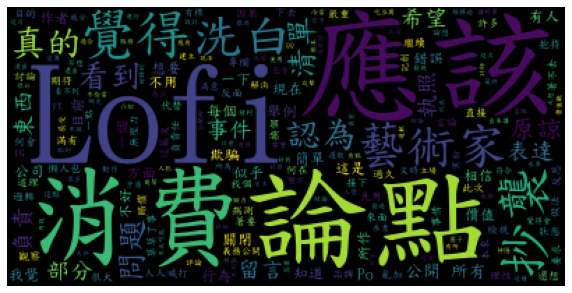

In [264]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

font_path = 'kaiu.ttf'
wc = WordCloud(
  background_color='black',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

seg_list=' '.join(remainderWords)
wc.generate(seg_list)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()